In [1]:
# System libraries
import re
import os
import unicodedata
import itertools as itt

# Library for file manipulation
import pandas as pd
import numpy as np

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.12.6
Author: Library versions

platform  : 1.0.8
matplotlib: 3.10.0
numpy     : 1.26.4
seaborn   : 0.13.2
IPython   : 8.27.0
pandas    : 2.2.2
re        : 2.2.1
plotly    : 5.24.1
watermark : 2.5.0



In [2]:
file_path_csv = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Complete_Updated_Autoimmune_Disorder_Dataset.csv'
df = pd.read_csv(file_path_csv)

## 1. Exploratory Data Analysis

In [3]:
# Viewing the first 5 data
df.head()

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,...,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,MBL
0,6,62,Male,Autoimmune orchitis,41,4.75,13.37,43.11,101.91,28.41,...,0,0,0,0,0,0,0,0,0,0.051675
1,20,54,Female,Autoimmune orchitis,41,4.32,10.76,39.92,95.96,28.22,...,0,0,0,0,0,0,0,0,0,0.065344
2,46,34,Male,Autoimmune orchitis,86,4.42,11.91,38.38,80.56,28.40,...,0,0,0,0,0,0,0,0,0,0.126083
3,108,22,Male,Autoimmune orchitis,43,4.33,12.72,39.99,84.71,26.67,...,0,0,0,0,0,0,0,0,0,0.251571
4,142,20,Female,Autoimmune orchitis,50,3.99,11.07,43.58,89.87,30.64,...,0,0,0,0,0,0,0,0,0,0.459332


In [4]:
# Viewing the liast 5 data
df.tail()

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,...,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,MBL
13807,8323,30,Female,Normal,76,4.369449,12.616547,40.702933,99.409783,29.852514,...,0,0,0,0,0,0,0,0,0,4.458054
13808,5192,78,Male,Normal,34,5.104874,14.749487,42.749227,97.561459,30.820043,...,0,0,0,0,0,0,0,0,0,2.398731
13809,1185,33,Male,Normal,56,5.840766,16.979142,47.139018,80.555161,28.324916,...,0,0,0,0,0,0,0,0,0,4.287405
13810,2559,37,Female,Normal,110,5.197375,14.351748,42.746795,80.760921,28.409289,...,0,0,0,1,0,0,0,0,0,3.385175
13811,2048,73,Male,Normal,112,5.986583,15.815299,42.444557,83.665471,31.380579,...,0,0,0,1,0,0,0,0,0,4.477346


In [5]:
df.describe()

,Patient_ID,Age,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,...,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,MBL
count,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,...,13812.000000,13812.000000,13812.000000,13812.000000,13812.000000,13812.00000,13812.000000,13812.0,13812.000000,13812.000000
mean,4943.404431,49.507023,62.589125,4.413987,12.855142,41.071055,89.791482,29.218271,33.479772,13.877249,...,0.004054,0.007385,0.000724,0.017593,0.007168,0.00362,0.001231,0.0,0.002968,0.653552
std,2973.417945,17.659349,33.604675,0.555170,1.650173,2.941540,8.077185,1.673751,1.407444,1.197298,...,0.063548,0.085621,0.026899,0.131473,0.084361,0.06006,0.035063,0.0,0.054404,1.067056
min,6.000000,20.000000,1.000000,3.510000,10.000000,36.000000,75.090000,26.000000,31.000000,11.500689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000007
25%,2333.250000,34.000000,34.000000,3.960000,11.470000,38.620000,82.870000,27.900000,32.310000,12.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.147896
50%,5192.000000,48.000000,62.000000,4.400000,12.920000,41.027491,89.455557,29.270000,33.510000,13.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.296318
75%,7605.000000,66.000000,91.000000,4.810000,14.210000,43.200000,96.725969,30.630000,34.670000,14.950000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.444317
max,9999.000000,79.000000,119.000000,6.099889,17.195634,50.282139,104.970000,32.000000,35.999406,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,1.000000,4.999038


In [6]:
# Rows and columns
df.shape

(13812, 80)

In [7]:
# Data type
df.dtypes

Patient_ID                    int64
Age                           int64
Gender                       object
Diagnosis                    object
Sickness_Duration_Months      int64
                             ...   
Anti_Mi2                      int64
Anti_parietal_cell            int64
Progesterone_antibodies       int64
Anti_Sm                       int64
MBL                         float64
Length: 80, dtype: object

##### Tablodaki sütun isimlerinin açıklamaları şu şekildedir:

**Patient_ID:** Hastanın kimlik numarası.<br/>
**Age:** Hastanın yaşı.<br/>
**Gender:** Hastanın cinsiyeti (Male/Female).<br/>
**Diagnosis:** Hastalığın teşhisi.<br/>
**Sickness_Duration_Months:** Hastalığın süresi (ay olarak).<br/>
**RBC_Count:** Kırmızı kan hücresi (alyuvar) sayısı.<br/>
**Hemoglobin:** Kanın hemoglobin seviyesi.<br/>
**Hematocrit:** Kan hacminde kırmızı kan hücrelerinin oranı.<br/>
**MCV:** Ortalama alyuvar hacmi.<br/>
**MCH:** Ortalama alyuvar hemoglobin miktarı.<br/>
**MCHC:** Alyuvarlarda hemoglobin konsantrasyonu.<br/>
**RDW:** Alyuvar dağılım genişliği.<br/>
**Reticulocyte_Count:** Retikülosit (genç alyuvar) sayısı.<br/>
**WBC_Count:** Beyaz kan hücresi (akyuvar) sayısı.<br/>
**Neutrophils:** Nötrofil yüzdesi.<br/>
**Lymphocytes:** Lenfosit yüzdesi.<br/>
**Monocytes:** Monosit yüzdesi.<br/>
**Eosinophils:** Eozinofil yüzdesi.<br/>
**Basophils:** Bazofil yüzdesi.<br/>
**PLT_Count:** Trombosit (platelet) sayısı.<br/>
**MPV:** Ortalama trombosit hacmi.<br/>
**ANA:** Antinükleer antikor testi sonucu.<br/>
**Esbach:** Esbach testi sonucu (protein kaçağı için).<br/>
**MBL_Level:** Mannoz bağlayıcı lektin seviyesi.<br/>
**ESR:** Eritrosit sedimentasyon hızı.<br/>
**C3:** Kompleman C3 seviyesi.<br/>
**C4:** Kompleman C4 seviyesi.<br/>
**CRP:** C-reaktif protein seviyesi (iltihap göstergesi).<br/>
**Anti-dsDNA:** Çift sarmallı DNA'ya karşı antikorlar.<br/>
**Anti-Sm:** Sm antijenine karşı antikorlar.<br/>
**Rheumatoid factor:** Romatoid faktör seviyesi.<br/>
**ACPA:** Anti-sitrülinlenmiş protein antikorları.<br/>
**Anti-TPO:** Anti-tiroid peroksidaz antikorları.<br/>
**Anti-Tg:** Anti-tiroglobulin antikorları.<br/>
**Anti-SMA:** Anti-düz kas antikorları.<br/>
**Low-grade fever:** Hafif dereceli ateş.<br/>
**Fatigue or chronic tiredness:** Yorgunluk veya kronik halsizlik.<br/>
**Dizziness:** Baş dönmesi.<br/>
**Weight loss:** Kilo kaybı.<br/>
**Rashes and skin lesions:** Döküntü ve deri lezyonları.<br/>
**Stiffness in the joints:** Eklemlerde sertlik.<br/>
**Brittle hair or hair loss:** Kırılgan saç veya saç dökülmesi.<br/>
**Dry eyes and/or mouth:** Kuru gözler ve/veya ağız.<br/>
**General 'unwell' feeling:** Genel bir "hasta hissetme" durumu.<br/>
**Joint pain:** Eklem ağrısı.<br/>
**Anti_enterocyte_antibodies:** Enterositlere karşı antikorlar.<br/>
**Anti_LKM1:** Anti-larence-karaciğer-antikorları (LKM1).<br/>
**Anti_RNP:** Ribonükleoproteinlere karşı antikorlar.<br/>
**ASCA:** Anti-Saccharomyces cerevisiae antikorları (Crohn hastalığı ile ilişkili).<br/>
**Anti_Ro_SSA:** Ro/SSA antijenine karşı antikorlar.<br/>
**Anti_CBir1:** CBir1 antijenine karşı antikorlar.<br/>
**Anti_BP230:** BP230 antijenine karşı antikorlar (bullöz hastalıklarla ilişkili).<br/>
**Anti_tTG:** Anti-doku transglutaminaz antikorları.<br/>
**DGP:** Deamidated gliadin peptid antikorları.<br/>
**Anti_BP180:** BP180 antijenine karşı antikorlar (pemfigoid ile ilişkili).<br/>
**ASMA:** Anti-düz kas antikorları (tekrar olabilir).<br/>
**Anti_IF:** İçsel faktörlere (Intrinsic Factor) karşı antikorlar.<br/>
**IgG_IgE_receptor:** IgG veya IgE reseptörüne karşı antikorlar.<br/>
**Anti_SRP:** Sinyal tanıma partikülüne karşı antikorlar.<br/>
**Anti_desmoglein_3:** Desmoglein 3'e karşı antikorlar (pemfigus ile ilişkili).<br/>
**Anti_La_SSB:** La/SSB antijenine karşı antikorlar.<br/>
**Anti_Jo1:** Jo-1 antijenine karşı antikorlar (dermatomiyozit ile ilişkili).<br/>
**ANCA:** Antinötrofil sitoplazmik antikorlar.<br/>
**Anti_centromere:** Sentromer proteinlerine karşı antikorlar.<br/>
**Anti_desmoglein_1:** Desmoglein 1'e karşı antikorlar (pemfigus ile ilişkili).<br/>
**EMA:** Anti-endomisyum antikorları (çölyak hastalığı ile ilişkili).<br/>
**Anti_type_VII_collagen:** Tip VII kollajene karşı antikorlar (epidermolizis bullosa ile ilişkili).<br/>
**C1_inhibitor:** C1 inhibitör seviyesi (kompleman sistemiyle ilişkili).<br/>
**Anti_TIF1:** TIF1 antijenine karşı antikorlar.<br/>
**Anti_epidermal_basement_membrane_IgA:** Epidermal bazal membrana karşı IgA antikorları.<br/>
**Anti_OmpC:** Dış membran protein C'ye karşı antikorlar.<br/>
**pANCA:** Perinükleer antinötrofil sitoplazmik antikorlar.<br/>
**Anti_tissue_transglutaminase:** Anti-doku transglutaminaz (tekrar olabilir).<br/>
**Anti_Scl_70:** Scl-70 antijenine karşı antikorlar (sistemik skleroz ile ilişkili).<br/>
**Anti_Mi2:** Mi-2 antijenine karşı antikorlar.<br/>
**Anti_parietal_cell:** Parietal hücrelere karşı antikorlar.<br/>
**Progesterone_antibodies:** Progesterona karşı antikorlar.<br/>
**Anti_Sm:** Sm antijenine karşı antikorlar (tekrar olabilir).<br/>
**MBL:** Mannoz bağlayıcı lektin (tekrar olabilir).

##### İleri Analizler için Sütun Seçme

In [8]:
# Orijinal dosyayı yükleme
file_path_csv = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Complete_Updated_Autoimmune_Disorder_Dataset.csv'
data_filtered = pd.read_csv(file_path_csv, dtype={"Anti-Tg": int, "Anti-TPO": int,"Dry eyes and mouth": int, 
                                                  "Joint pain": int, "ACPA":int})  # INteger olarak oku

# İstediğiniz sütunları seçin
selected_columns = ['Gender', 'Diagnosis', "RBC_Count", "Hemoglobin","Hematocrit", "CRP", "Esbach",
                    "Anti-Tg", "Anti-TPO", "Dry eyes and mouth", "Joint pain","ACPA","Fatigue or chronic tiredness"]  

df = data_filtered[selected_columns].copy()

"""
# Seçilen sütunlarla yeni bir CSV dosyası oluşturma
output_path = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Selected_Columns_Autoimmune_Dataset.csv'
df.to_csv(output_path, index=False)

print(f"Yeni CSV dosyası oluşturuldu: {output_path}")
"""
df

,Gender,Diagnosis,RBC_Count,Hemoglobin,Hematocrit,CRP,Esbach,Anti-Tg,Anti-TPO,Dry eyes and mouth,Joint pain,ACPA,Fatigue or chronic tiredness
0,Male,Autoimmune orchitis,4.750000,13.370000,43.110000,29.182553,154.915372,0,1,1,0,1,1
1,Female,Autoimmune orchitis,4.320000,10.760000,39.920000,22.356969,447.570310,1,1,1,1,0,0
2,Male,Autoimmune orchitis,4.420000,11.910000,38.380000,24.933347,236.292853,0,1,1,0,1,0
3,Male,Autoimmune orchitis,4.330000,12.720000,39.990000,46.448538,239.695961,0,0,0,1,1,1
4,Female,Autoimmune orchitis,3.990000,11.070000,43.580000,45.904132,466.374954,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13807,Female,Normal,4.369449,12.616547,40.702933,0.129678,101.731314,1,0,1,1,0,0
13808,Male,Normal,5.104874,14.749487,42.749227,0.422182,25.991969,1,0,1,0,0,1
13809,Male,Normal,5.840766,16.979142,47.139018,0.009546,81.750752,0,0,0,0,0,0
13810,Female,Normal,5.197375,14.351748,42.746795,0.804016,116.281738,1,0,0,0,0,1


## Graves ve Normal Verileri Ayırma

In [9]:
# "Graves' disease" ve "Normal" için veriyi filtreleme
selected_conditions = ["Graves' disease", "Normal"]
graves_disease_and_normal_data= df[df["Diagnosis"].isin(selected_conditions)]

# Dosya adını oluşturma
file_name_selected = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Graves_and_Normal_String_CBC_Data.csv"

"""
# Veriyi CSV olarak kaydetme
graves_disease_and_normal_data.to_csv(file_name_selected, index=False)

print(f"CSV file created for 'Graves' Disease and 'Normal': {file_name_selected}")
"""

graves_disease_and_normal_data

,Gender,Diagnosis,RBC_Count,Hemoglobin,Hematocrit,CRP,Esbach,Anti-Tg,Anti-TPO,Dry eyes and mouth,Joint pain,ACPA,Fatigue or chronic tiredness
7000,Male,Graves' disease,4.090000,10.940000,36.010000,27.113318,477.155076,1,0,0,0,1,0
7001,Male,Graves' disease,4.940000,11.300000,43.840000,31.263155,286.037096,0,0,1,0,0,1
7002,Male,Graves' disease,4.640000,10.460000,41.720000,42.927513,201.330763,1,0,1,1,0,0
7003,Male,Graves' disease,3.590000,14.020000,42.630000,41.599658,225.135911,1,0,1,1,1,1
7004,Female,Graves' disease,4.950000,14.240000,38.250000,13.102074,447.682484,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13807,Female,Normal,4.369449,12.616547,40.702933,0.129678,101.731314,1,0,1,1,0,0
13808,Male,Normal,5.104874,14.749487,42.749227,0.422182,25.991969,1,0,1,0,0,1
13809,Male,Normal,5.840766,16.979142,47.139018,0.009546,81.750752,0,0,0,0,0,0
13810,Female,Normal,5.197375,14.351748,42.746795,0.804016,116.281738,1,0,0,0,0,1


**Rounded_Float_Columns_Autoimmune_Dataset.csv** dosyasındaki verileri kullanarak Graves' Hastalığı için ayrı bir csv dosyası oluşturdum

## Basic Statistics

In [10]:
# Diagnosis değerlerini normalize et (küçük harfe çevir, boşlukları temizle)
graves_disease_and_normal_data['Diagnosis'] = graves_disease_and_normal_data['Diagnosis'].astype(str).str.strip().str.lower()

# Graves' Disease ve Normal hastaları ayırma
normal_group = graves_disease_and_normal_data[graves_disease_and_normal_data['Diagnosis'] == "normal"]
graves_group = graves_disease_and_normal_data[graves_disease_and_normal_data['Diagnosis'] == "graves' disease"]

# Eğer herhangi bir grup boşsa, hata almamak için kontrol ekleyelim
if normal_group.empty:
    print("Hata: Normal grubu için veri bulunamadı!")
if graves_group.empty:
    print("Hata: Graves' Disease grubu için veri bulunamadı!")

# Temel istatistikleri hesaplama
summary_stats_graves = graves_group.describe()
summary_stats_normal = normal_group.describe()

# Sonuçları kullanıcıya gösterme
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Graves için Temel İstatistikler", dataframe=summary_stats_graves)
tools.display_dataframe_to_user(name="Normal için Temel İstatistikler", dataframe=summary_stats_normal)


Graves için Temel İstatistikler


Normal için Temel İstatistikler


## Correlation Matrix

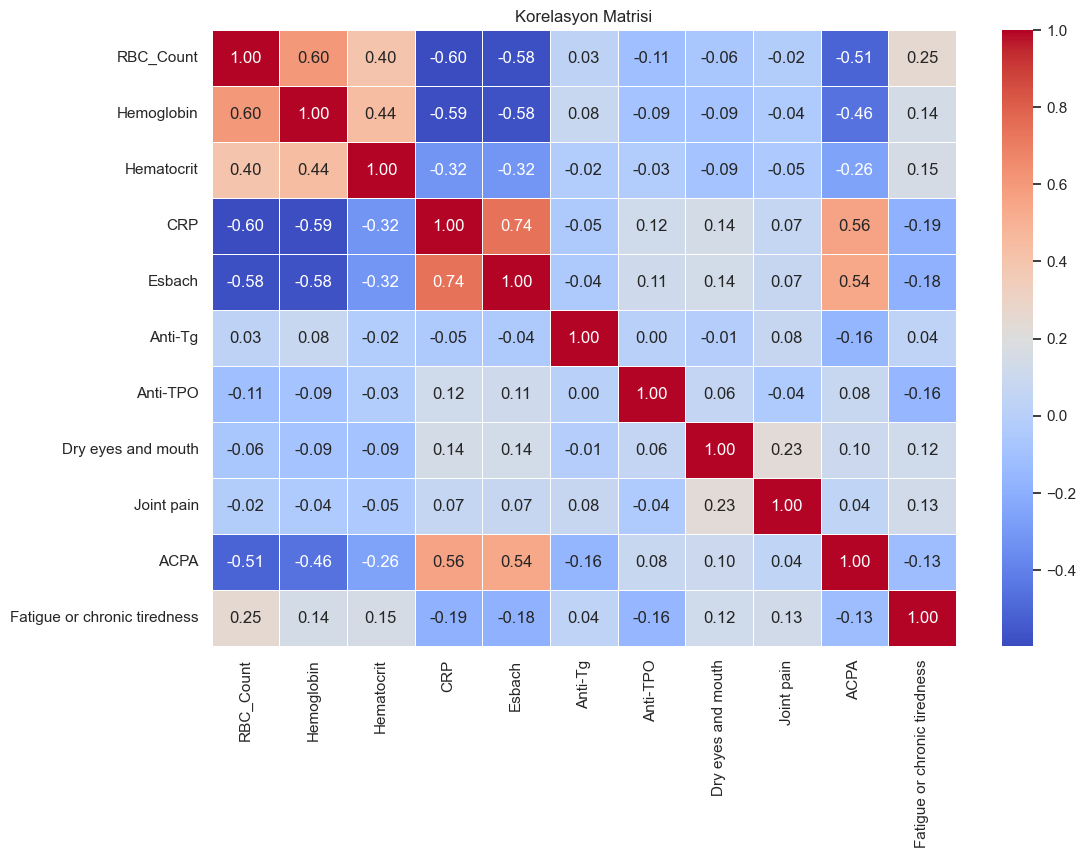

In [11]:
# Korelasyon matrisini hesaplama
numeric_df = graves_disease_and_normal_data.select_dtypes(include=["number"])  # Sadece sayısal sütunları seç
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

## Histplot

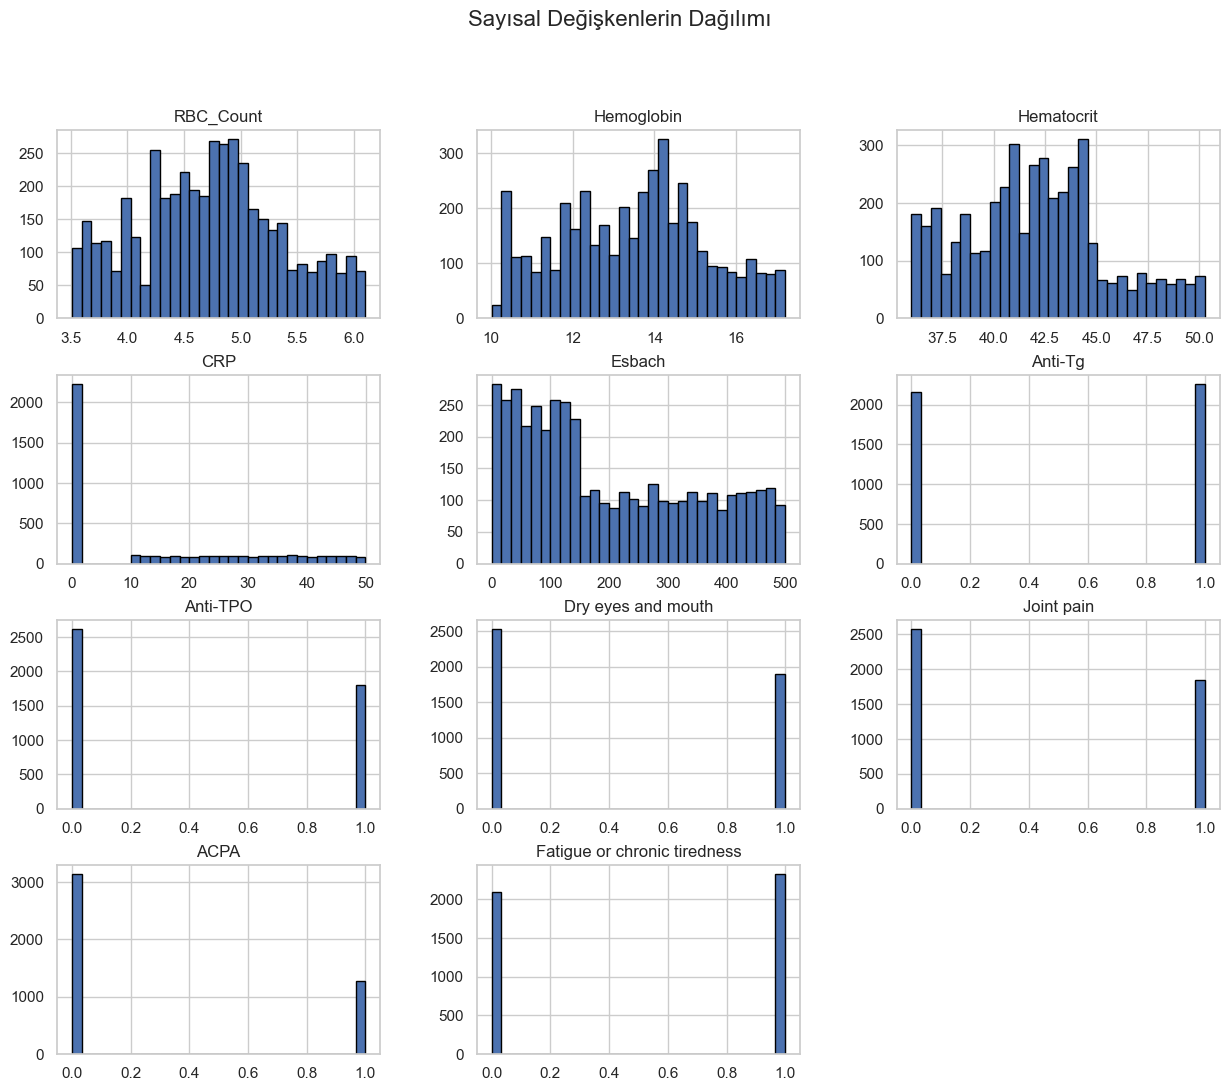

In [12]:
# Sayısal değişkenlerin histogramlarını çizme
numeric_df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Sayısal Değişkenlerin Dağılımı", fontsize=16)
plt.show()

### Patients Count for Graves Disease and Normal

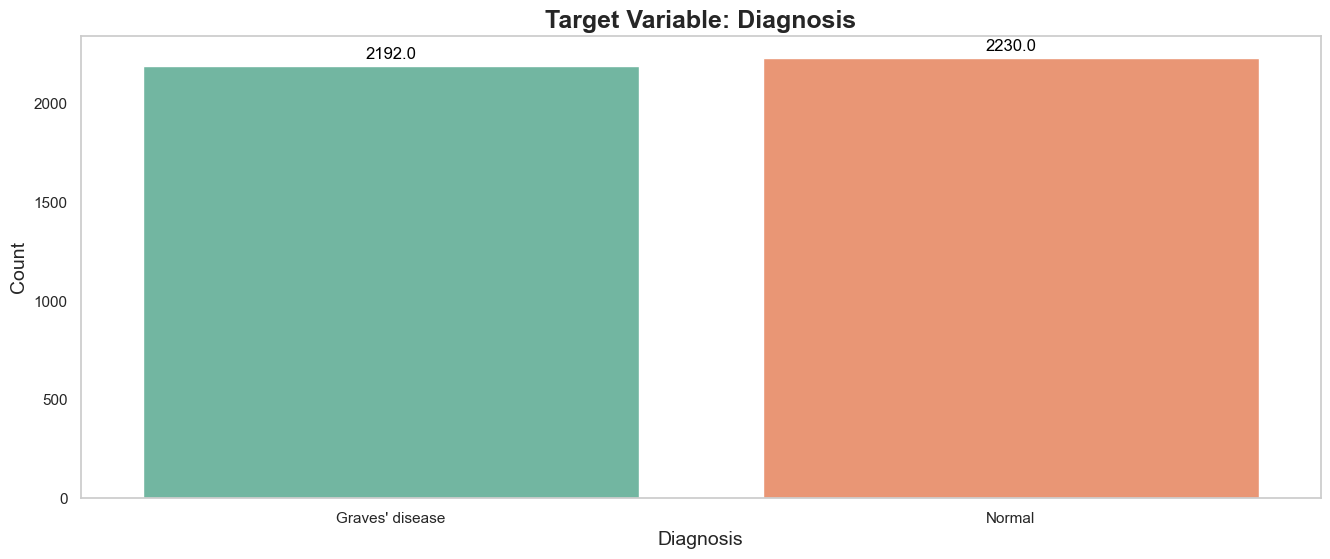

In [13]:
selected_conditions = ["Graves' disease", "Normal"]
graves_disease_and_normal_data = df[df["Diagnosis"].isin(selected_conditions)]

# Diagnosis değişkeni için Count Plot oluşturma
plt.figure(figsize=(16, 6))
sns.countplot(x=graves_disease_and_normal_data["Diagnosis"], palette='Set2')

# Başlık ve etiketleri ekleyelim
plt.title('Target Variable: Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel("Diagnosis", fontsize=14)
plt.ylabel('Count', fontsize=14)

# Sütunların üstüne sayıları ekleme
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

# Grid kaldır
plt.grid(False)

# Grafiği göster
plt.show()


## Graves ve Normal Grubun CBC Değerleri Grafikleri

,Gender,Diagnosis,RBC_Count,Hemoglobin,Hematocrit,CRP,Esbach,Anti-Tg,Anti-TPO,Dry eyes and mouth,Joint pain,ACPA,Fatigue or chronic tiredness
7000,Male,graves' disease,4.090000,10.940000,36.010000,27.113318,477.155076,1,0,0,0,1,0
7001,Male,graves' disease,4.940000,11.300000,43.840000,31.263155,286.037096,0,0,1,0,0,1
7002,Male,graves' disease,4.640000,10.460000,41.720000,42.927513,201.330763,1,0,1,1,0,0
7003,Male,graves' disease,3.590000,14.020000,42.630000,41.599658,225.135911,1,0,1,1,1,1
7004,Female,graves' disease,4.950000,14.240000,38.250000,13.102074,447.682484,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13807,Female,normal,4.369449,12.616547,40.702933,0.129678,101.731314,1,0,1,1,0,0
13808,Male,normal,5.104874,14.749487,42.749227,0.422182,25.991969,1,0,1,0,0,1
13809,Male,normal,5.840766,16.979142,47.139018,0.009546,81.750752,0,0,0,0,0,0
13810,Female,normal,5.197375,14.351748,42.746795,0.804016,116.281738,1,0,0,0,0,1


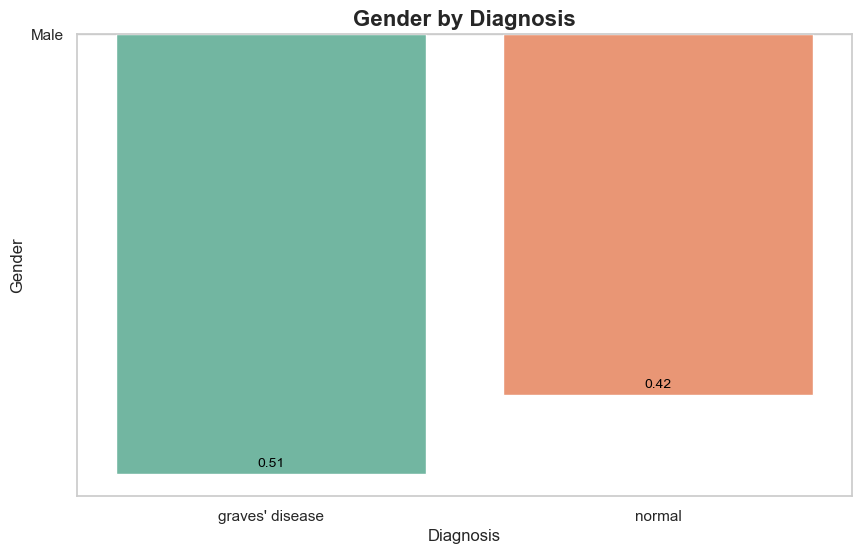

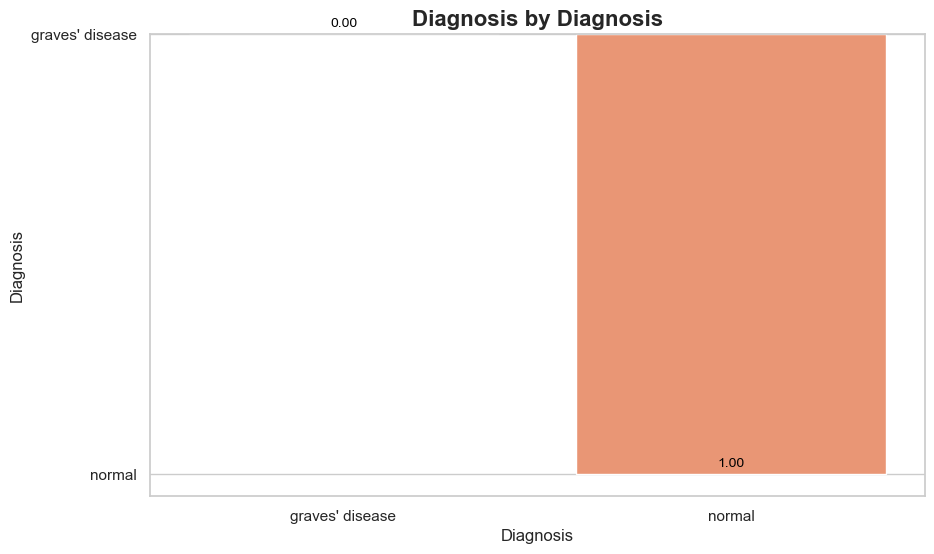

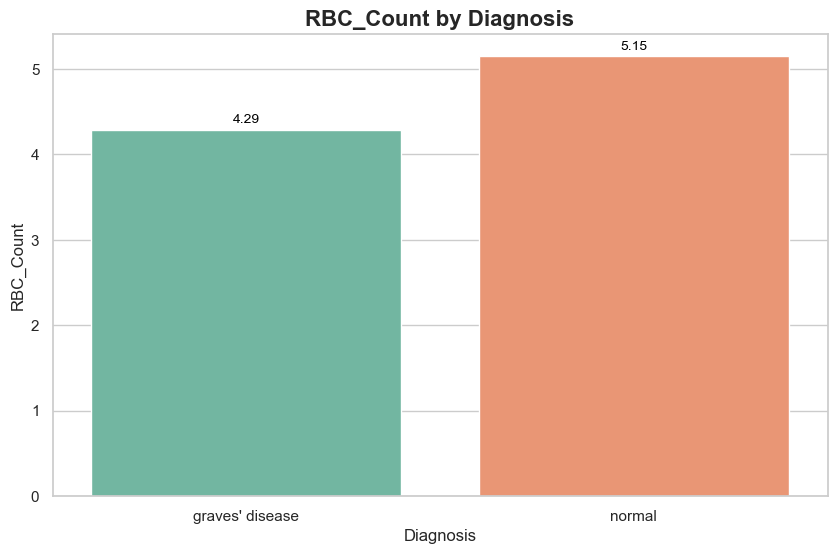

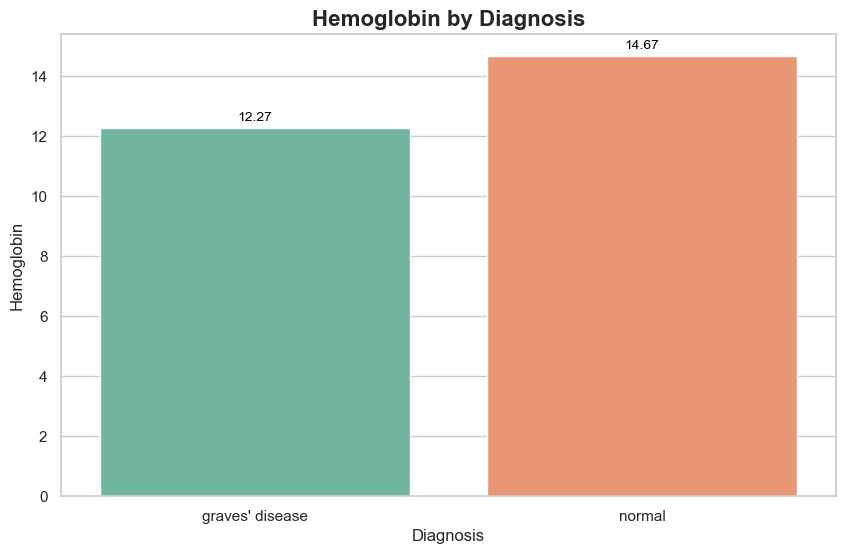

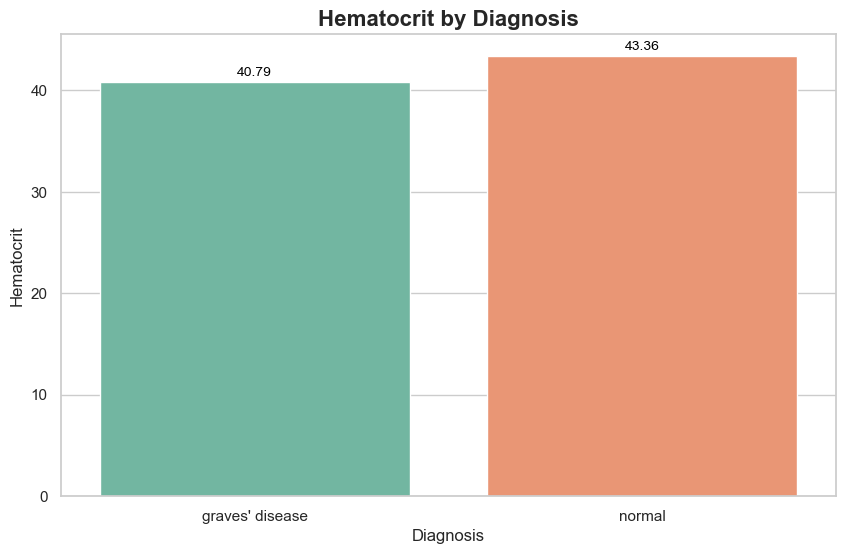

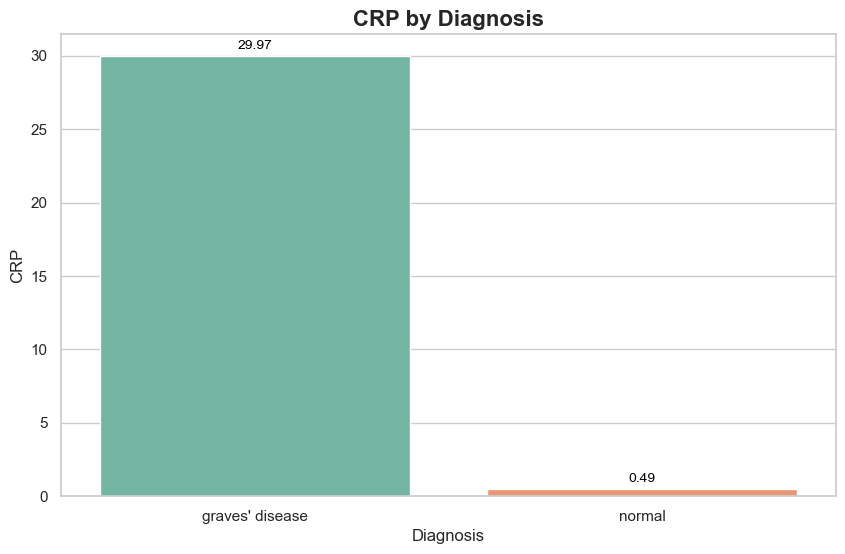

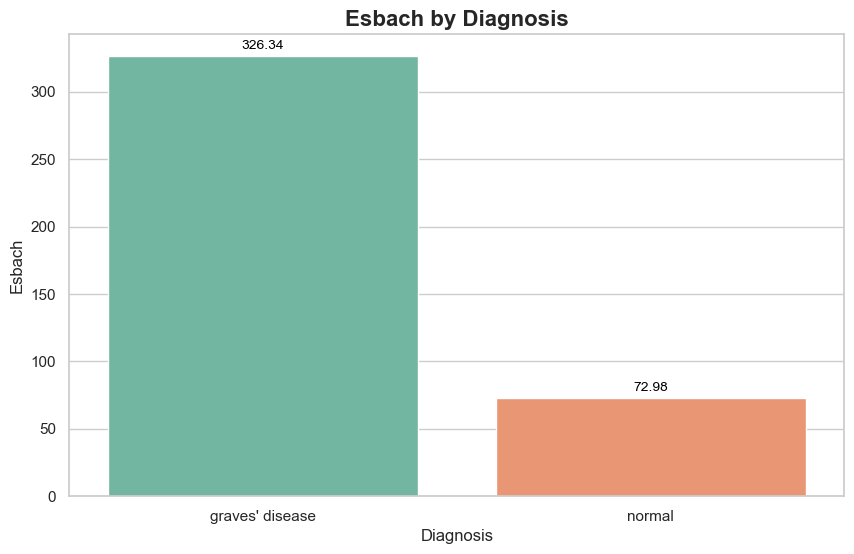

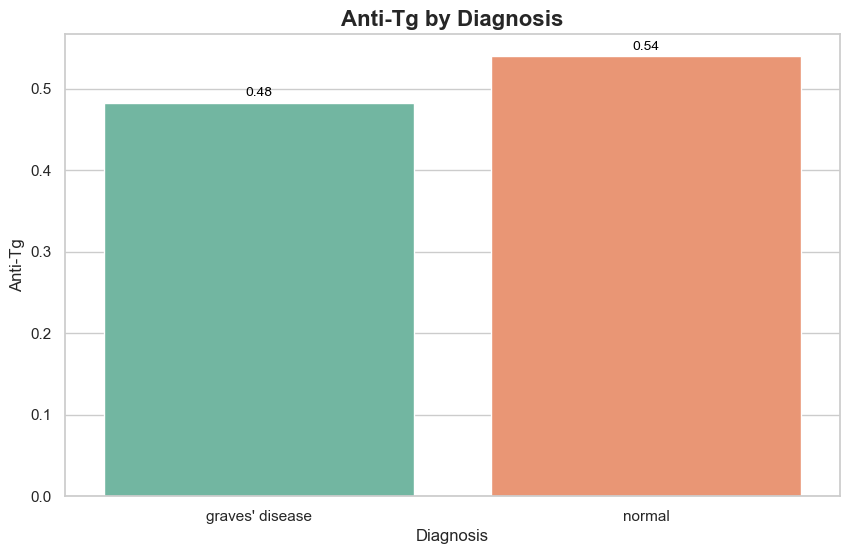

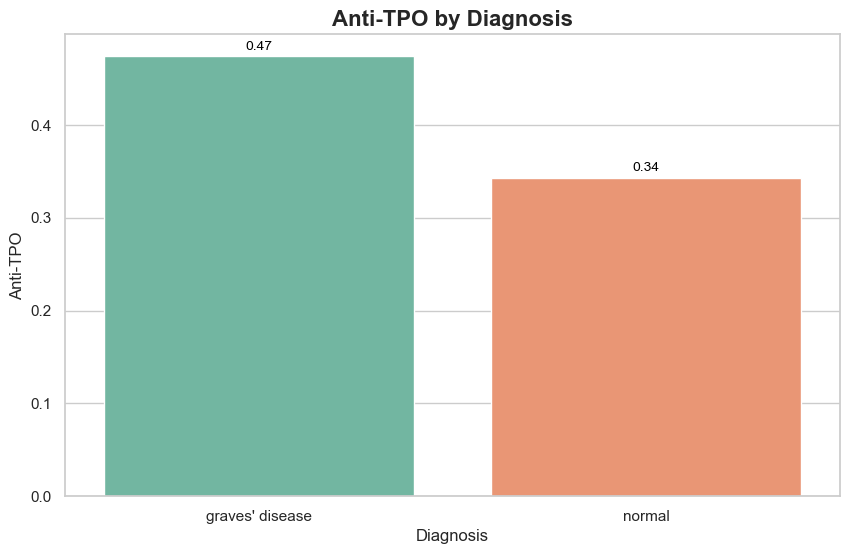

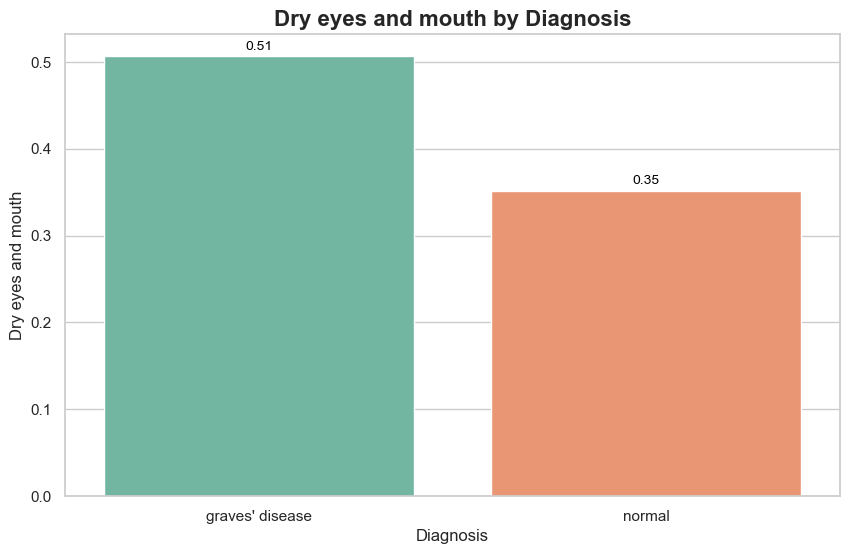

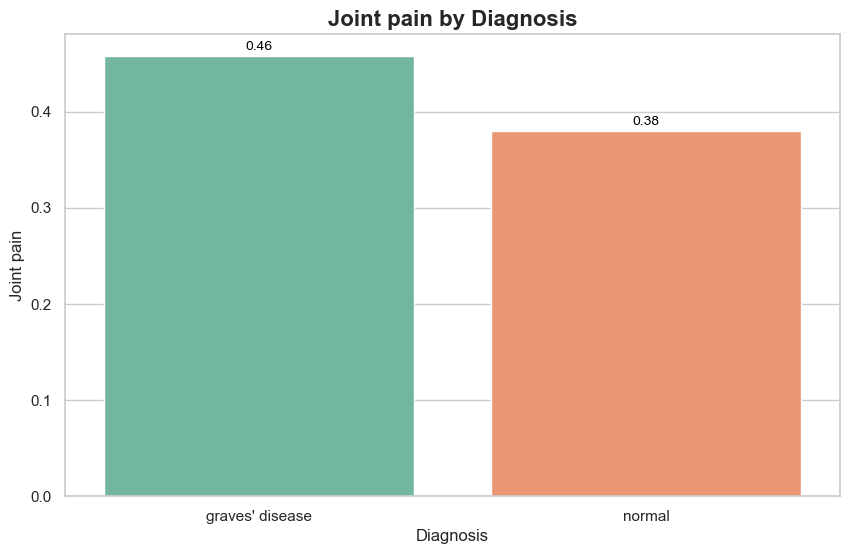

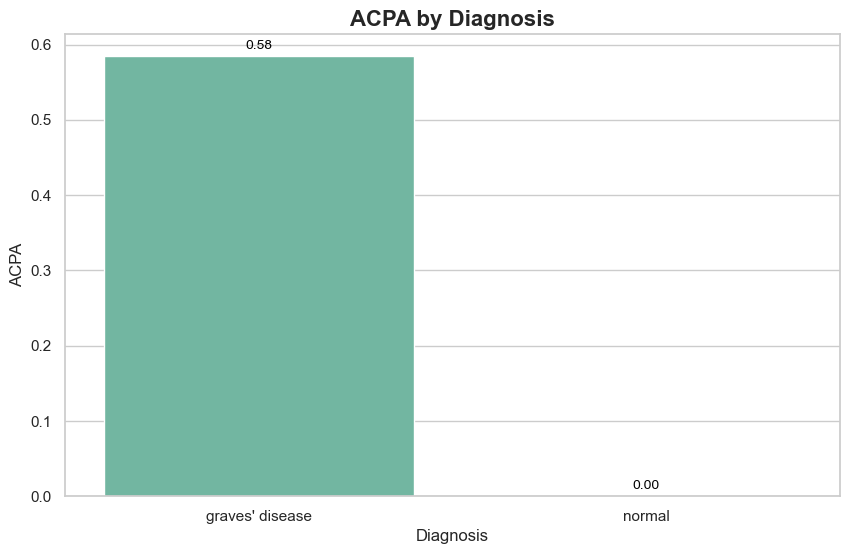

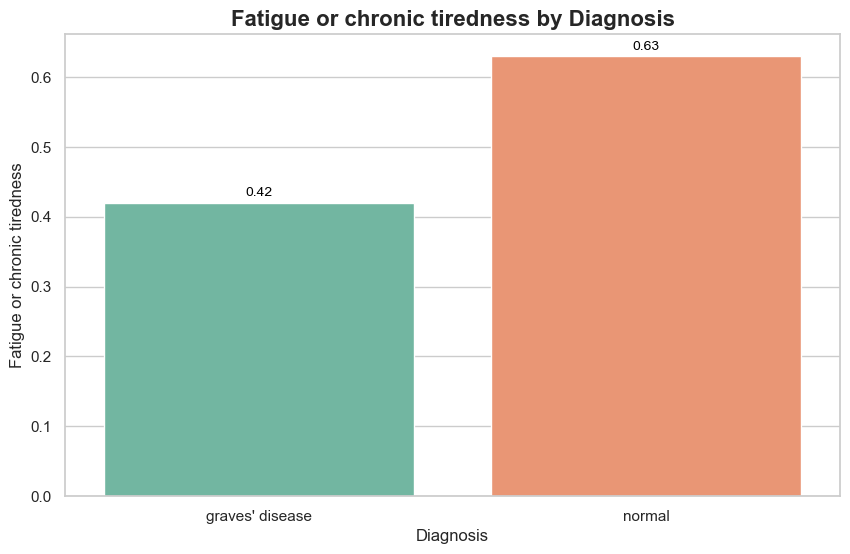

In [14]:
# Normalize the Diagnosis column
graves_disease_and_normal_data['Diagnosis'] = graves_disease_and_normal_data['Diagnosis'].astype(str).str.strip().str.lower()

# Kullanıcıdan alt klasör dizinini belirtmesini isteyin
output_folder = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\'
output_folder = os.path.join(output_folder, "Graves_and_Normal_Analysis")
os.makedirs(output_folder, exist_ok=True)

# Y ekseni için birden fazla değişken tanımlayın
y_axis_variables = [
'Gender', 'Diagnosis', "RBC_Count", "Hemoglobin","Hematocrit", "CRP", "Esbach",
"Anti-Tg", "Anti-TPO", "Dry eyes and mouth", "Joint pain","ACPA","Fatigue or chronic tiredness"
]

# Define a function to clean file names
def clean_filename(name):
    return name.replace("/", "_").replace("\\", "_").replace(" ", "_").replace(":", "_").replace("?", "_").replace("*", "_")

# Plot each Y-axis variable and save individual Excel tables
for y_var in y_axis_variables:
    if y_var in graves_disease_and_normal_data.columns:
        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Diagnosis', y=y_var, data=graves_disease_and_normal_data, palette='Set2', ci=None)

        # Add title and labels
        plt.title(f'{y_var} by Diagnosis', fontsize=16, fontweight='bold')
        plt.xlabel('Diagnosis', fontsize=12)
        plt.ylabel(y_var, fontsize=12)

        # Annotate bar plot with values
        for p in plt.gca().patches:
            height = p.get_height()
            if not pd.isna(height):  # Ensure height is not NaN
                plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                                   ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                                   textcoords='offset points')

        # Clean the variable name for safe file naming
        clean_y_var = clean_filename(y_var)

        """
        # Save the plot as an image
        plot_file_path = os.path.join(output_folder, f"{clean_y_var}_by_Diagnosis.png")
        plt.savefig(plot_file_path, bbox_inches='tight')
        plt.close()

        # Save the corresponding data to an Excel file
        data_to_save = graves_disease_and_normal_data.groupby('Diagnosis')[y_var].mean().reset_index()
        excel_file_path = os.path.join(output_folder, f"{clean_y_var}_by_Diagnosis.xlsx")
        data_to_save.to_excel(excel_file_path, index=False)

        print(f"Graph saved at: {plot_file_path}")
        print(f"Data table saved at: {excel_file_path}")

print(f"All graphs and individual tables have been saved in the folder: {output_folder}")
"""

graves_disease_and_normal_data

## CBC Values for Gender with Standard Deviation

In [15]:
import os
import matplotlib.pyplot as plt

def save_and_plot_gender_groups_with_cbc_values(graves_disease_and_normal_data, target_column, save_tables=False, save_plots=False, output_path=None):
    """
    Gender gruplarına göre CBC değerlerini analiz eder, ortalama ve standart sapmalarını hesaplar.
    Tabloyu kaydeder ve grafik oluşturur.
    
    Parametreler:
    - graves_disease_and_normal_data: Pandas DataFrame, analiz edilecek veri seti.
    - target_column: Hedef sütun (örn: "Diagnosis").
    - save_tables: Tabloları kaydetmek için True/False.
    - save_plots: Grafikleri kaydetmek için True/False.
    - output_path: Çıktının kaydedileceği ana klasör.
    """

    # Sadece float sütunları seç
    float_columns = graves_disease_and_normal_data.select_dtypes(include=['float']).columns

    # Binary sütunları çıkar (sadece 0 ve 1 içerenleri tespit et)
    binary_columns = [col for col in float_columns if graves_disease_and_normal_data[col].dropna().nunique() == 2]
    float_columns = [col for col in float_columns if col not in binary_columns]  # Binary olanları çıkart

    # Çıktı klasörünü belirle
    if output_path:
        output_folder = os.path.join(output_path, "CBC_Values_by_Gender")
        os.makedirs(output_folder, exist_ok=True)
    else:
        raise ValueError("Output path cannot be None or empty.")

    # İşlem yapılan dosyaların kaydedildiği dizinleri takip etmek için liste
    saved_files = []

    # Her float sütun için analiz yap
    for col in float_columns:
        # Cinsiyete (Gender) göre gruplama ve ortalama & standart sapma hesaplama
        grouped_data = graves_disease_and_normal_data.groupby('Gender')[col].agg(['mean', 'std']).reset_index()
        grouped_data.columns = ['Gender', f'{col}_mean', f'{col}_std']  # Sütun isimlerini düzenle

        # Tabloyu CSV veya Excel olarak kaydet
        if save_tables:
            output_file = os.path.join(output_folder, f"{col}_gender_group_table.xlsx")
            grouped_data.to_excel(output_file, index=False)
            saved_files.append(output_file)

        # Grafik çizimi ve kaydetme
        if save_plots:
            plt.figure(figsize=(12, 6))

            # Hata çubuklarıyla ortalama değerleri gösteren çubuk grafik çizimi
            plt.bar(
                grouped_data['Gender'], 
                grouped_data[f'{col}_mean'], 
                yerr=grouped_data[f'{col}_std'], 
                capsize=5, 
                color=['#4C72B0', '#C44E52'],  # Erkek ve kadın için farklı renkler
                alpha=0.7
            )

            # Başlık ve etiketler
            plt.title(f'{col} Levels by Gender', fontsize=16)
            plt.xlabel('Gender', fontsize=12)
            plt.ylabel(f'{col} Level', fontsize=12)
            plt.xticks(fontsize=10)
            plt.tight_layout()

            # Grafik dosyasını kaydetme
            plot_file = os.path.join(output_folder, f"{col}_plot_by_gender.png")
            plt.savefig(plot_file, bbox_inches='tight')
            plt.close()
            saved_files.append(plot_file)

    # İşlem tamamlandığında kaydedilen dosyaların listesini yazdır
    print(f"Files saved to {output_folder}:\n" + "\n".join(saved_files))


# Kullanım
output_path = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\"

save_and_plot_gender_groups_with_cbc_values(
    graves_disease_and_normal_data,
    target_column='Diagnosis',
    save_tables=True,
    save_plots=True,
    output_path=output_path
)

Files saved to E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender:
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\RBC_Count_gender_group_table.xlsx
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\RBC_Count_plot_by_gender.png
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\Hemoglobin_gender_group_table.xlsx
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\Hemoglobin_plot_by_gender.png
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\Hematocrit_gender_group_table.xlsx
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\Hematocrit_plot_by_gender.png
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\CRP_gender_group_table.xlsx
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\CRP_plot_by_gender.png
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\Esbach_gender_group_table.xlsx
E:\Veri Bilimi Topluluğu\proje-AID\github\CBC_Values_by_Gender\Esbach_plot_by_g

## Graves için Her Bir Gruptaki Veri Sayısı

In [16]:
# Diagnosis sütunundaki boşlukları ve harf büyüklüğünü normalize et
graves_disease_and_normal_data['Diagnosis'] = graves_disease_and_normal_data['Diagnosis'].astype(str).str.strip().str.lower()

# Sadece Graves' disease grubunu seç
graves_data = graves_disease_and_normal_data[graves_disease_and_normal_data['Diagnosis'] == "graves' disease"]

# İncelenecek CBC değişkenlerini tanımla
cbc_variables = ['Gender', 'Diagnosis', "RBC_Count", "Hemoglobin", "Hematocrit", "CRP", "Esbach",
                 "Anti-Tg", "Anti-TPO", "Dry eyes and mouth", "Joint pain", "ACPA", "Fatigue or chronic tiredness"]

# Graves' disease grubunda cinsiyete göre non-null değerleri say
cbc_counts = graves_data.groupby('Gender')[cbc_variables].count()

# Sonuçları ekrana yazdır
print("Graves' disease grubundaki CBC değişkenlerinin cinsiyete göre dağılımı:")
print(cbc_counts)

Graves' disease grubundaki CBC değişkenlerinin cinsiyete göre dağılımı:
        Gender  Diagnosis  RBC_Count  Hemoglobin  Hematocrit   CRP  Esbach  \
Gender                                                                       
Female    1115       1115       1115        1115        1115  1115    1115   
Male      1077       1077       1077        1077        1077  1077    1077   

        Anti-Tg  Anti-TPO  Dry eyes and mouth  Joint pain  ACPA  \
Gender                                                            
Female     1115      1115                1115        1115  1115   
Male       1077      1077                1077        1077  1077   

        Fatigue or chronic tiredness  
Gender                                
Female                          1115  
Male                            1077  


## Normal için Her Bir Gruptaki Veri Sayısı

In [17]:
# Diagnosis sütunundaki boşlukları ve harf büyüklüğünü normalize et
graves_disease_and_normal_data['Diagnosis'] = graves_disease_and_normal_data['Diagnosis'].astype(str).str.strip().str.lower()

# Sadece Graves' disease grubunu seç
normal_data = graves_disease_and_normal_data[graves_disease_and_normal_data['Diagnosis'] == "normal"]

# İncelenecek CBC değişkenlerini tanımla
cbc_variables = ['Gender', 'Diagnosis', "RBC_Count", "Hemoglobin", "Hematocrit", "CRP", "Esbach",
                 "Anti-Tg", "Anti-TPO", "Dry eyes and mouth", "Joint pain", "ACPA", "Fatigue or chronic tiredness"]

# Graves' disease grubunda cinsiyete göre non-null değerleri say
cbc_counts = normal_data.groupby('Gender')[cbc_variables].count()

# Sonuçları ekrana yazdır
print("Normal disease grubundaki CBC değişkenlerinin cinsiyete göre dağılımı:")
print(cbc_counts)

Normal disease grubundaki CBC değişkenlerinin cinsiyete göre dağılımı:
        Gender  Diagnosis  RBC_Count  Hemoglobin  Hematocrit   CRP  Esbach  \
Gender                                                                       
Female     930        930        930         930         930   930     930   
Male      1300       1300       1300        1300        1300  1300    1300   

        Anti-Tg  Anti-TPO  Dry eyes and mouth  Joint pain  ACPA  \
Gender                                                            
Female      930       930                 930         930   930   
Male       1300      1300                1300        1300  1300   

        Fatigue or chronic tiredness  
Gender                                
Female                           930  
Male                            1300  


## Convert from String to Integer

In [18]:
# Ensure Gender and Diagnosis columns are strings and normalized
graves_disease_and_normal_data['Gender'] = graves_disease_and_normal_data['Gender'].astype(str).str.strip().str.lower()
graves_disease_and_normal_data['Diagnosis'] =graves_disease_and_normal_data['Diagnosis'].astype(str).str.strip().str.lower()

# Mapping for Gender and Diagnosis columns
gender_mapping = {'male': 0, 'female': 1}
diagnosis_mapping = {"graves' disease": 0, 'normal': 1}

# Apply the mappings
graves_disease_and_normal_data['Gender'] = graves_disease_and_normal_data['Gender'].map(gender_mapping)
graves_disease_and_normal_data['Diagnosis'] = graves_disease_and_normal_data['Diagnosis'].map(diagnosis_mapping)

# Check for NaN values after mapping
if graves_disease_and_normal_data['Diagnosis'].isnull().sum() > 0:
    print("Warning: Unmapped values found in Diagnosis column!")
    print(graves_disease_and_normal_data['Diagnosis'].unique())  # Display all unique values for debugging

# Remove duplicates if any
graves_disease_and_normal_data = graves_disease_and_normal_data.drop_duplicates()

"""
# Save the updated dataset
output_file_path = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Graves_and_Normal_Integer_CBC_Data.csv'
graves_disease_and_normal_data.to_csv(output_file_path, index=False)
print(f"File saved: {output_file_path}")
"""

graves_disease_and_normal_data

,Gender,Diagnosis,RBC_Count,Hemoglobin,Hematocrit,CRP,Esbach,Anti-Tg,Anti-TPO,Dry eyes and mouth,Joint pain,ACPA,Fatigue or chronic tiredness
7000,0,0,4.090000,10.940000,36.010000,27.113318,477.155076,1,0,0,0,1,0
7001,0,0,4.940000,11.300000,43.840000,31.263155,286.037096,0,0,1,0,0,1
7002,0,0,4.640000,10.460000,41.720000,42.927513,201.330763,1,0,1,1,0,0
7003,0,0,3.590000,14.020000,42.630000,41.599658,225.135911,1,0,1,1,1,1
7004,1,0,4.950000,14.240000,38.250000,13.102074,447.682484,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13807,1,1,4.369449,12.616547,40.702933,0.129678,101.731314,1,0,1,1,0,0
13808,0,1,5.104874,14.749487,42.749227,0.422182,25.991969,1,0,1,0,0,1
13809,0,1,5.840766,16.979142,47.139018,0.009546,81.750752,0,0,0,0,0,0
13810,1,1,5.197375,14.351748,42.746795,0.804016,116.281738,1,0,0,0,0,1


# Save the File

In [ ]:
"""
import nbformat
import os
from datetime import datetime
import ipynbname

def save_current_notebook_as_backup(save_directory):
    try:
        # Find current notebook
        notebook_path = ipynbname.path()

        # Create backup name with timestamp
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"before_ML_{timestamp}.ipynb"

        # Create backup index and save to notebook
        os.makedirs(save_directory, exist_ok=True)
        with open(notebook_path, 'r', encoding='utf-8') as f:
            notebook_content = nbformat.read(f, as_version=4)

        new_file_path = os.path.join(save_directory, filename)
        with open(new_file_path, 'w', encoding='utf-8') as f:
            nbformat.write(notebook_content, f)

        print(f"Notebook {new_file_path} olarak kaydedildi.")
        return new_file_path
    except Exception as e:
        print(f"Hata oluştu: {e}")

# Usage
save_current_notebook_as_backup("E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\")
"""

## Select Column for Machine Learning

In [ ]:
# İstenilen sütunları seçme
selected_columns_for_AI = ["Diagnosis","RBC_Count", "Hemoglobin","CRP", "Esbach","Anti-Tg","Anti-TPO", 
                           "Dry eyes and mouth", "Joint pain","ACPA","Fatigue or chronic tiredness"]

ML_filtered_df = graves_disease_and_normal_data_[selected_columns_for_AI].copy()

"""
# Seçilen sütunlarla yeni bir CSV dosyası oluşturma
output_path = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\Selected_Columns_for_ML_Autoimmune_Dataset.csv'
AI_filtered_df_int.to_csv(output_path, index=False)

print(f"Yeni CSV dosyası oluşturuldu: {output_path}")
"""

ML_filtered_df

## Statistics for ML Columns

In [ ]:
# Veriyi yükleme
file_path = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\Graves_and_Normal_String_CBC_Data.csv"
AI_filtered_df_string = pd.read_csv(file_path)

# Diagnosis sütununu normalize et
AI_filtered_df_string['Diagnosis'] = AI_filtered_df_string['Diagnosis'].astype(str).str.strip().str.lower()

# Analiz edilecek değişkenler
y_axis_variables = []

# Eksik değerleri kontrol et ve kaldır
AI_filtered_df_string.dropna(subset=y_axis_variables, inplace=True)

# Sonuçları saklamak için boş bir sözlük başlatma
results = {
    "Variable": [],
    "Normal_Mean": [],
    "Normal_Std": [],
    "Graves_Mean": [],
    "Graves_Std": [],
    "Normal_SE": [],
    "Graves_SE": []
}

# Her değişken için istatistik hesaplama
for y_var in y_axis_variables:
    if y_var in AI_filtered_df_string.columns:
        # Grupları filtrele
        normal_group = AI_filtered_df_string[AI_filtered_df_string['Diagnosis'] == "normal"]
        graves_group = AI_filtered_df_string[AI_filtered_df_string['Diagnosis'] == "graves' disease"]

        # Ortalamalar ve standart sapmalar
        results["Variable"].append(y_var)
        results["Normal_Mean"].append(normal_group[y_var].mean())
        results["Normal_Std"].append(normal_group[y_var].std())
        results["Normal_SE"].append(normal_group[y_var].std() / (len(normal_group) ** 0.5))  # SE = SD / sqrt(n)
        results["Graves_Mean"].append(graves_group[y_var].mean())
        results["Graves_Std"].append(graves_group[y_var].std())
        results["Graves_SE"].append(graves_group[y_var].std() / (len(graves_group) ** 0.5))  # SE = SD / sqrt(n)

# DataFrame oluşturma
stats_df_AI = pd.DataFrame(results)

# Excel dosyasına kaydetme
output_excel_path = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\Graves_and_Normal_for_AI_Statistics.xlsx"
stats_df_AI.to_excel(output_excel_path, index=False)

# Tamamlanan mesaj
print(stats_df_AI)
print(f"Excel file saved at: {output_excel_path}")

AI_filtered_df_string
stats_df_AI

## Columns that choosen with ML in 20-40 Ages

In [ ]:
def choosen_cbc_values_for_ML(AI_filtered_df_string, target_column, save_tables=False, save_plots=False, output_path=None):
    # Identify all float columns in the dataset
    float_columns = AI_filtered_df_string.select_dtypes(include=['float']).columns

    # Define age range and filter the dataset for this range
    age_filter = (AI_filtered_df_string['Age'] >= 20) & (AI_filtered_df_string['Age'] < 40)
    filtered_data = AI_filtered_df_string[age_filter]

    # Alt klasör oluşturma
    if output_path:
        output_folder = os.path.join(output_path, "CBC_Values_with_20-40_Age")
        os.makedirs(output_folder, exist_ok=True)
    else:
        raise ValueError("Output path cannot be None or empty.")

    # İşlem yapılan dosyaların kaydedildiği dizinleri takip etmek için liste
    saved_files = []

    # Her float sütun için döngü
    for col in float_columns:
        # Gruplama ve ortalamaları alma
        grouped_data = filtered_data.groupby(target_column)[col].agg(['mean', 'std']).reset_index()
        grouped_data.columns = [target_column, f'{col}_mean', f'{col}_std']  # Kolon adlarını düzenleme

        # Tabloyu CSV veya Excel olarak kaydet
        if save_tables:
            output_file = os.path.join(output_folder, f"{col}_age_range_table.xlsx")
            grouped_data.to_excel(output_file, index=False)
            saved_files.append(output_file)

        # Grafik çizimi ve kaydetme
        if save_plots:
            plt.figure(figsize=(12, 6))

            # Hata çubuklarını eklemek için seaborn.barplot yerine matplotlib kullanıyoruz
            plt.bar(
                grouped_data[target_column], 
                grouped_data[f'{col}_mean'], 
                yerr=grouped_data[f'{col}_std'], 
                capsize=5, 
                color=['#4635B1', '#09122C'],  # Farklı gruplar için renkler
                alpha=0.7
            )
            
            # Başlık ve etiketler
            plt.title(f'{col} Levels by {target_column} (Age 20-40)', fontsize=16)
            plt.xlabel('Disease', fontsize=12)
            plt.ylabel(f'{col} Level', fontsize=12)
            plt.xticks(fontsize=10)
            plt.tight_layout()

            """
            # Grafik dosyasını kaydetme
            plot_file = os.path.join(output_folder, f"{col}_plot_with_std.png")
            plt.savefig(plot_file, bbox_inches='tight')
            plt.close()
            saved_files.append(plot_file)

    # İşlem tamamlandığında kaydedilen dosyaların listesini yazdır
    print(f"Files saved to {output_folder}:\n" + "\n".join(saved_files))
"""
            
# Kullanım
output_path = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\"

            
choosen_cbc_values_for_ML(
    AI_filtered_df_string,
    target_column='Diagnosis',
    #save_tables=True,
    save_plots=True,
    output_path=output_path
)

## Columns that choosen with ML in 40-60 Ages

In [ ]:
def choosen_cbc_values_for_ML(AI_filtered_df_string, target_column, save_tables=False, save_plots=False, output_path=None):
    # Identify all float columns in the dataset
    float_columns = AI_filtered_df_string.select_dtypes(include=['float']).columns

    # Define age range and filter the dataset for this range
    age_filter = (AI_filtered_df_string['Age'] >= 40) & (AI_filtered_df_string['Age'] < 60)
    filtered_data = AI_filtered_df_string[age_filter]

    # Alt klasör oluşturma
    if output_path:
        output_folder = os.path.join(output_path, "CBC_Values_with_40-60_Age")
        os.makedirs(output_folder, exist_ok=True)

    # İşlem yapılan dosyaların kaydedildiği dizinleri takip etmek için liste
    saved_files = []

    # Her float sütun için döngü
    for col in float_columns:
        # Gruplama ve ortalamaları alma
        grouped_data = filtered_data.groupby(target_column)[col].agg(['mean', 'std']).reset_index()
        grouped_data.columns = [target_column, f'{col}_mean', f'{col}_std']  # Kolon adlarını düzenleme

        # Tabloyu CSV veya Excel olarak kaydet
        if save_tables:
            output_file = os.path.join(output_folder, f"{col}_age_range_table.xlsx")
            grouped_data.to_excel(output_file, index=False)
            saved_files.append(output_file)

        # Grafik çizimi ve kaydetme
        if save_plots:
            plt.figure(figsize=(12, 6))

            # Hata çubuklarını eklemek için seaborn.barplot yerine matplotlib kullanıyoruz
            plt.bar(
                grouped_data[target_column], 
                grouped_data[f'{col}_mean'], 
                yerr=grouped_data[f'{col}_std'], 
                capsize=5, 
                color=['#4635B1', '#09122C'],  # Farklı gruplar için renkler
                alpha=0.7
            )
            
            # Başlık ve etiketler
            plt.title(f'{col} Levels by {target_column} (Age 40-60)', fontsize=16)
            plt.xlabel('Disease', fontsize=12)
            plt.ylabel(f'{col} Level', fontsize=12)
            plt.xticks(fontsize=10)
            plt.tight_layout()

            """
            # Grafik dosyasını kaydetme
            plot_file = os.path.join(output_folder, f"{col}_plot_with_std.png")
            plt.savefig(plot_file, bbox_inches='tight')
            plt.close()
            saved_files.append(plot_file)

    # İşlem tamamlandığında kaydedilen dosyaların listesini yazdır
    print(f"Files saved to {output_folder}:\n" + "\n".join(saved_files))
"""
            
# Kullanım
output_path = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\"

            
choosen_cbc_values_for_ML(
    AI_filtered_df_string,
    target_column='Diagnosis',
    #save_tables=True,
    save_plots=True,
    output_path=output_path
)

## Columns that choosen with ML in 60-80 Ages

In [ ]:
def choosen_cbc_values_for_ML(AI_filtered_df_string, target_column, save_tables=False, save_plots=False, output_path=None):
    # Identify all float columns in the dataset
    float_columns = AI_filtered_df_string.select_dtypes(include=['float']).columns

    # Define age range and filter the dataset for this range
    age_filter = (AI_filtered_df_string['Age'] >= 60) & (AI_filtered_df_string['Age'] < 80)
    filtered_data = AI_filtered_df_string[age_filter]

    # Alt klasör oluşturma
    if output_path:
        output_folder = os.path.join(output_path, "CBC_Values_with_60-80_Age")
        os.makedirs(output_folder, exist_ok=True)

    # İşlem yapılan dosyaların kaydedildiği dizinleri takip etmek için liste
    saved_files = []

    # Her float sütun için döngü
    for col in float_columns:
        # Gruplama ve ortalamaları alma
        grouped_data = filtered_data.groupby(target_column)[col].agg(['mean', 'std']).reset_index()
        grouped_data.columns = [target_column, f'{col}_mean', f'{col}_std']  # Kolon adlarını düzenleme

        # Tabloyu CSV veya Excel olarak kaydet
        if save_tables:
            output_file = os.path.join(output_folder, f"{col}_age_range_table.xlsx")
            grouped_data.to_excel(output_file, index=False)
            saved_files.append(output_file)

        # Grafik çizimi ve kaydetme
        if save_plots:
            plt.figure(figsize=(12, 6))

            # Hata çubuklarını eklemek için seaborn.barplot yerine matplotlib kullanıyoruz
            plt.bar(
                grouped_data[target_column], 
                grouped_data[f'{col}_mean'], 
                yerr=grouped_data[f'{col}_std'], 
                capsize=5, 
                color=['#4635B1', '#09122C'],  # Farklı gruplar için renkler
                alpha=0.7
            )
            
            # Başlık ve etiketler
            plt.title(f'{col} Levels by {target_column} (Age 60-80)', fontsize=16)
            plt.xlabel('Disease', fontsize=12)
            plt.ylabel(f'{col} Level', fontsize=12)
            plt.xticks(fontsize=10)
            plt.tight_layout()

            """
            # Grafik dosyasını kaydetme
            plot_file = os.path.join(output_folder, f"{col}_plot_with_std.png")
            plt.savefig(plot_file, bbox_inches='tight')
            plt.close()
            saved_files.append(plot_file)

    # İşlem tamamlandığında kaydedilen dosyaların listesini yazdır
    print(f"Files saved to {output_folder}:\n" + "\n".join(saved_files))
"""
            
# Kullanım
output_path = "E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\"

            
choosen_cbc_values_for_ML(
    AI_filtered_df_string,
    target_column='Diagnosis',
    #save_tables=True,
    save_plots=True,
    output_path=output_path
)

## Correlation Analysis

In [ ]:
num_cols = ['Age','Diagnosis', "RBC_Count","Hemoglobin","Eosinophils","Basophils","CRP","Esbach"]

# Check for columns that exist in the DataFrame
num_cols = [col for col in num_cols if col in AI_filtered_df.columns]

corr = AI_filtered_df[num_cols].corr()
corr

## Correlation Matrix

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

**General Description:**<br/>

1. Matrix Structure:

- Each cell in the heatmap represents the correlation coefficient between two variables.<br/>
- Variables are listed along both the x-axis and y-axis.<br/>

2. Color Scheme (cmap="coolwarm"):

The RdBu colormap is used:<br/>
- Blue (Positive Correlation): Indicates that two variables are positively correlated (as one increases, the other also tends to increase).<br/>
- Red (Negative Correlation): Indicates a negative correlation (as one increases, the other tends to decrease).<br/>
- White/Light Shades: Near-zero correlations, implying no strong linear relationship.<br/>

3. Annotations (annot=corr_values):<br/>

-Each cell is annotated with the numerical value of the correlation coefficient (rounded to two decimal places).

**Key Correlation Coefficients:**<br/>

1. Range of Values:

Values range from -1 to 1:<br/>
   - +1: Perfect positive linear relationship.<br/>
   - -1: Perfect negative linear relationship.<br/>
   -  0: No linear relationship.<br/>
     
2. Strong Correlations:

- Cells with values close to +1 or -1 (intense red or blue shades) indicate strong relationships.<br/>
- Look for clusters of strong correlations to identify groups of variables that are highly related.

3. Weak/No Correlations:

- Cells near 0 (white or light shades) suggest weak or no linear relationship between the variables.

**How to Use the Heatmap:**<br/>

1. Identify Highly Correlated Variables:

- Strong positive correlations (e.g., close to +1) suggest variables that might contain redundant information.
- Strong negative correlations (e.g., close to -1) suggest inverse relationships.<br/>

2. Feature Selection:

- If two variables are strongly correlated, consider removing one from your model to reduce multicollinearity.

3. Data Relationships:

- The heatmap helps you quickly spot trends and relationships in the data that might not be immediately apparent.

# TENSORFLOW

## Extract the data from the csv

In [ ]:
"""
raw_csv_data = pd.read_csv('E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\Graves_and_Normal_Integer_CBC_Data.csv')

# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)

unscaled_inputs_all = raw_csv_data.iloc[:, 1:-1].values

# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = raw_csv_data.iloc[:,-1].values
"""

## Balance the dataset

In [ ]:
"""
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0. 
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)
"""

## Standardize the inputs

In [ ]:
"""
from sklearn import preprocessing

# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs, as we explained in one of the lectures.
# At the end of the business case, you can try to run the algorithm WITHOUT this line of code. 
# The result will be interesting.
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)
"""

## Shuffle the data

In [ ]:
"""
# When the data was collected it was actually arranged by date
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]
"""

## Split the dataset into train, validation, and test

In [ ]:
"""
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)
"""

## Save the three datasets in *.npz

In [ ]:
# Save the three datasets in *.npz.
# In the next lesson, you will see that it is extremely valuable to name them in such a coherent way!
"""
np.savez('AutoImmuneDisease_data_train', inputs=train_inputs, targets=train_targets)
np.savez('AutoImmuneDisease_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('AutoImmuneDisease_data_test', inputs=test_inputs, targets=test_targets)
"""

In [ ]:
"""
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('AutoImmuneDisease_data_train.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(int)

# we load the validation data in the temporary variable
npz = np.load('AutoImmuneDisease_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# we load the test data in the temporary variable
npz = np.load('AutoImmuneDisease_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)
"""

In [ ]:
"""
import tensorflow as tf

# Set the input and output sizes
input_size = 10
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  
"""

## Test the model

In [ ]:
# test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

In [ ]:
# print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

# Save the Model

In [ ]:
"""
import nbformat
import os
from datetime import datetime
import ipynbname

def save_current_notebook_as_backup(save_directory):
    try:
        # Find current notebook
        notebook_path = ipynbname.path()

        # Create backup name with timestamp
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"Tensor_Flow_Analysis_{timestamp}.ipynb"

        # Create backup index and save to notebook
        os.makedirs(save_directory, exist_ok=True)
        with open(notebook_path, 'r', encoding='utf-8') as f:
            notebook_content = nbformat.read(f, as_version=4)

        new_file_path = os.path.join(save_directory, filename)
        with open(new_file_path, 'w', encoding='utf-8') as f:
            nbformat.write(notebook_content, f)

        print(f"Notebook {new_file_path} olarak kaydedildi.")
        return new_file_path
    except Exception as e:
        print(f"Hata oluştu: {e}")

# Usage
save_current_notebook_as_backup("E:\\Veri Bilimi Topluluğu\\proje-AID\\github-Graves Disease\\")
"""